# NE 630 - Lesson 25

**LAST TIME**: The linear reactivity model; cycle length; discharge burnup.


**TODAY**: neutron kinetics in the absence of multiplication; mean neutron speed and lifetime

**NEXT TIME**: read 5.2 (after Eq. (5.8)) and 5.3.

## NE 648 - Nuclear Reactor Laboratory

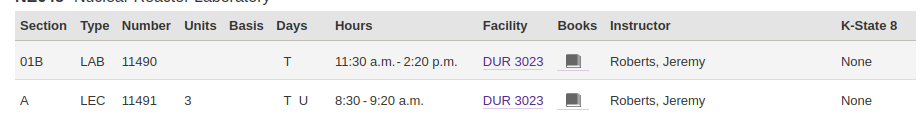

https://github.com/robertsj/ne648/tree/s22

# Revisiting the BIG PICTURE™

In the course introduction, I wrote the following horror:

$$
\begin{split}
\frac{1}{v} \frac{\partial \phi}{\partial t} 
 &- \nabla D(\mathbf{r}, E) \nabla \phi 
  + \Sigma_t(\mathbf{r}, E) \phi(\mathbf{r}, E, t) \\
  &= \int^{\infty}_0 \Sigma_s(\mathbf{r}, E'\to E) \phi(\mathbf{r}, E', t) dE' \\
  &+ \frac{\chi(E)}{k_{\text{eff}}} \int^{\infty}_0 \bar{\nu}(\mathbf{r}, E')\Sigma_f(\mathbf{r}, E') \phi(\mathbf{r}, E', t) dE'  \\
  &+ S(\mathbf{r}, E, t) \, .
\end{split}
$$


We still ignore space:

$$
\begin{split}
\frac{1}{v} \frac{\partial \phi}{\partial t} 
 &+ \Sigma_t(E) \phi( E, t) \\
  &= \int^{\infty}_0 \Sigma_s(E'\to E) \phi(E', t) dE' \\
  &+ \frac{\chi(E)}{k_{\text{eff}}} \int^{\infty}_0 \bar{\nu}(E')\Sigma_f(E') \phi(E', t) dE'  \\
  &+ S(E, t) \, .
\end{split}
$$


# The Kinetics Equation

We don't *ignore* energy, but we integrate it away:

$$
\begin{split}
\int^{\infty}_0 dE \Bigg \{
\frac{1}{v} \frac{\partial \phi}{\partial t} 
 &+ \Sigma_t(E) \phi( E, t) \\
  &= \int^{\infty}_0 \Sigma_s(E'\to E) \phi(E', t) dE' \\
  &+ \frac{\chi(E)}{k_{\text{eff}}} \int^{\infty}_0 \bar{\nu}(E')\Sigma_f(E') \phi(E', t) dE'  \\
  &+ S(E, t) \Bigg \} \, .
\end{split}
$$

If we assume that $\phi(E, t) = \phi(t)\varphi(E)$, then we can write

$$
\begin{split}
\frac{d\phi}{dt} \times \int^{\infty}_0  
\left ( \frac{\varphi(E)}{v(E)} \right ) dE
 + \bar{\Sigma}_t \phi(t) 
  = \bar{\Sigma}_s \phi(t)  + \frac{1}{k_{\text{eff}}} \bar{\nu}\bar{\Sigma}_f \phi(t) + S(t)  \, .
\end{split}
$$

$$
\begin{split}
  \frac{1}{\bar{v}}\frac{d\phi}{dt}
 + \bar{\Sigma}_t \phi(t) 
  = \bar{\Sigma}_s \phi(t)  + \frac{1}{k_{\text{eff}}} \bar{\nu}\bar{\Sigma}_f \phi(t) + S(t)  \, .
\end{split}
\tag{25-1}
$$

where, e.g., $\bar{\Sigma}_t = \int^{\infty}_0 \Sigma_t(E) \varphi(E) dE \Big / \int^{\infty}_0 \varphi(E) dE$ and

$$
   \boxed{\bar{v} = \frac{  \int^{\infty}_0 \varphi(E) dE }{  \int^{\infty}_0 \frac{\varphi(E)}{v(E)} dE }} \, .
\tag{25-2}
$$

## Example 1

Suppose the flux spectrum is $\varphi(E) = E e^{-E/kT}$.  What is $\bar{v}$?

In [1]:
import sympy as sy
E, k, T, m = sy.symbols('E, k, T, m', positive=True)

In [2]:
𝜑 = E*sy.exp(-E/(k*T))
v = sy.sqrt(2*E/m)

In [3]:
sy.integrate(𝜑, (E, 0, sy.oo)) / sy.integrate(𝜑/v, (E, 0, sy.oo))

2*sqrt(2)*sqrt(T)*sqrt(k)/(sqrt(pi)*sqrt(m))

# Kinetics Sans Multiplication

If we take $\bar{\Sigma}_f = 0$, then Eq. (25-1) becomes

$$
\begin{split}
  \frac{1}{\bar{v}}\frac{d\phi}{dt}
 + \bar{\Sigma}_t \phi(t) 
  = \bar{\Sigma}_s \phi(t) + S(t)  \, ,
\end{split}
$$

or

$$
\begin{split}
  \frac{1}{\bar{v}}\frac{d\phi}{dt}
 + \bar{\Sigma}_a \phi(t) 
  = S(t)  \, .
\end{split}
\tag{25-3}
$$

## Example 2

Rewrite Eq. (25-3) in terms of the neutron density $n'''(t)$.  What are the units of $n'''(t)$?

$\phi = nv \longrightarrow n' + \bar{\Sigma}_a \bar{v} n(t) = S(t)$

## Example 3

Suppose that $S(t) = S_0 \delta(t)$ and that $n(0) = 0$. Find $n(t)$.

Here, the integrating factor is $e^{\bar{\Sigma}_a \bar{v}t}$ so that (you should *confirm* this)

$$
   \frac{d}{dt} \left ( n(t) e^{\bar{\Sigma}_a \bar{v}t} \right ) = S(t) e^{\bar{\Sigma}_a \bar{v}t} .
$$



Then, integrate from $t = 0$ (or some other initial time) to $t = t'$:


$$
   \int^{t'}_0 \frac{d}{dt} \left ( n(t) e^{\bar{\Sigma}_a \bar{v}t} \right ) dt = 
     \int^{t'}_0 \left( S(t) e^{\bar{\Sigma}_a \bar{v}t} \right ) dt .
$$

Evaluate the left-hand-side integral to get 

$$
   n(t') e^{\bar{\Sigma}_a \bar{v}t'} - n(0) = 
     \int^{t'}_0  \left( S(t) e^{\bar{\Sigma}_a \bar{v}t} \right ) dt .
$$

Now, solve for $n(t')$ to find

$$
   n(t') =  \frac{\int^{t'}_0  \left( S(t) e^{\bar{\Sigma}_a \bar{v}t} \right ) dt + n(0)}
                 {e^{\bar{\Sigma}_a \bar{v}t'}}
$$

Recall that a property of $\delta(t-t_0)$ is that for any function $f(t)$, an integral $\int^b_a f(t) \delta(t-t_0) dt = f(t_0)$ as long as $a \leq t_0 \leq b$.

Thus, for $S(t) = S_0 \delta(t)$ and $n(0) = 0$, we have

$$
   n(t') =  \frac{S_0 + 0}
                 {e^{\bar{\Sigma}_a \bar{v}t'}} \qquad \longrightarrow \qquad 
                 \boxed{n(t) = S_0 e^{-\Sigma_a \bar{v} t}} \, .
$$

# The Neutron Lifetime

If we consider $n(t)$ as just found, or, if $S_0 = 0$ and we let $n(0) = n_0$ such that

$$
 n(t) = n_0 e^{-\Sigma_a \bar{v} t} \, ,
$$

one should immediately see a similarity to 

$$
    I(x) = I_0 e^{-\Sigma x} \qquad \text{and} \qquad n(t) = n(0) e^{-\lambda t} \, .
$$

All three represent exponential attenuation in which

  - $\Sigma^{-1} = \tau$ is the mean-free path (i.e., distance traveled on the average between collisions)
  - $\lambda^{-1} = \bar{t}$ is the mean time (i.e., the time elapsed on the average before a nucleus decays)

 - $\boxed{l_{\infty} = [\bar{\Sigma}_a \bar{v}]^{-1} = \bar{t}}$ is also a mean time, but here is the time a neutron travels on the average before being absorbed (and, hence, "dying")

## Example 4

What's $l_{\infty}$ for thermal neutrons emitted in the center of a giant pool of room-temperature water?  Assume $\bar{\sigma}^{\text{H}_2\text{O}}_a = 0.6$ [b].

In [6]:
N_w = 1*6.022e23/18
N_w
import numpy as np
SigA = 0.6*1e-24 * N_w; SigA

E = 0.0253e-6 # MeV
m = 1.008*931.5 # MeV/c^2
b = np.sqrt(E/(0.5*m)); v = b*3e10

l = 1/(SigA*v); l

0.00022620681560871558